<a href="https://colab.research.google.com/github/IBeliveInMagic/Covid_Dados/blob/main/LSTM_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Página de onde foi retirada o algoritmo LSTM](https://apmonitor.com/do/index.php/Main/LSTMNetwork)

# **Importações**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Gerar Dados**

In [2]:
n = 500
t = np.linspace(0, 20.0*np.pi, n)
X = np.sin(t)

# **Preparar Dados**

In [3]:
# Conjunto de pontos passados para o modelo LSTM
window = 10

# Separar os dados em 80% treino e 20% teste

last = int(n/5.0)
Xtrain = X[:-last]
Xtest = X[-last-window:]

# Armarzenar window números de pontos em uma sequência
xin = []
next_X = []
for i in range(window,len(Xtrain)):
    xin.append(Xtrain[i-window:i])
    next_X.append(Xtrain[i])

# Transformar os dados para o formato LSTM
xin, next_X = np.array(xin), np.array(next_X)
xin = xin.reshape(xin.shape[0], xin.shape[1], 1)
#print(xin[0:5])

# **Modelo LSTM**

In [4]:
# Keras é uma interface do TensorFlow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Inicializar modelo LSTM

m = Sequential()
m.add(LSTM(units=50, return_sequences=True, input_shape=(xin.shape[1],1)))
m.add(Dropout(0.2))
m.add(LSTM(units=50))
m.add(Dropout(0.2))
m.add(Dense(units=1))
m.compile(optimizer = 'adam', loss = 'mean_squared_error')

Epoch 1/50
8/8 [==============================] - 7s 37ms/step - loss: 0.3995
Epoch 2/50
8/8 [==============================] - 0s 30ms/step - loss: 0.2473
Epoch 3/50
8/8 [==============================] - 0s 29ms/step - loss: 0.2117
Epoch 4/50
8/8 [==============================] - 0s 27ms/step - loss: 0.1830
Epoch 5/50
8/8 [==============================] - 0s 28ms/step - loss: 0.1570
Epoch 6/50
8/8 [==============================] - 0s 37ms/step - loss: 0.1244
Epoch 7/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0917
Epoch 8/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0392
Epoch 9/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0149
Epoch 10/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0157
Epoch 11/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0114
Epoch 12/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0106
Epoch 13/50
8/8 [==============================] - 0s 28ms/st

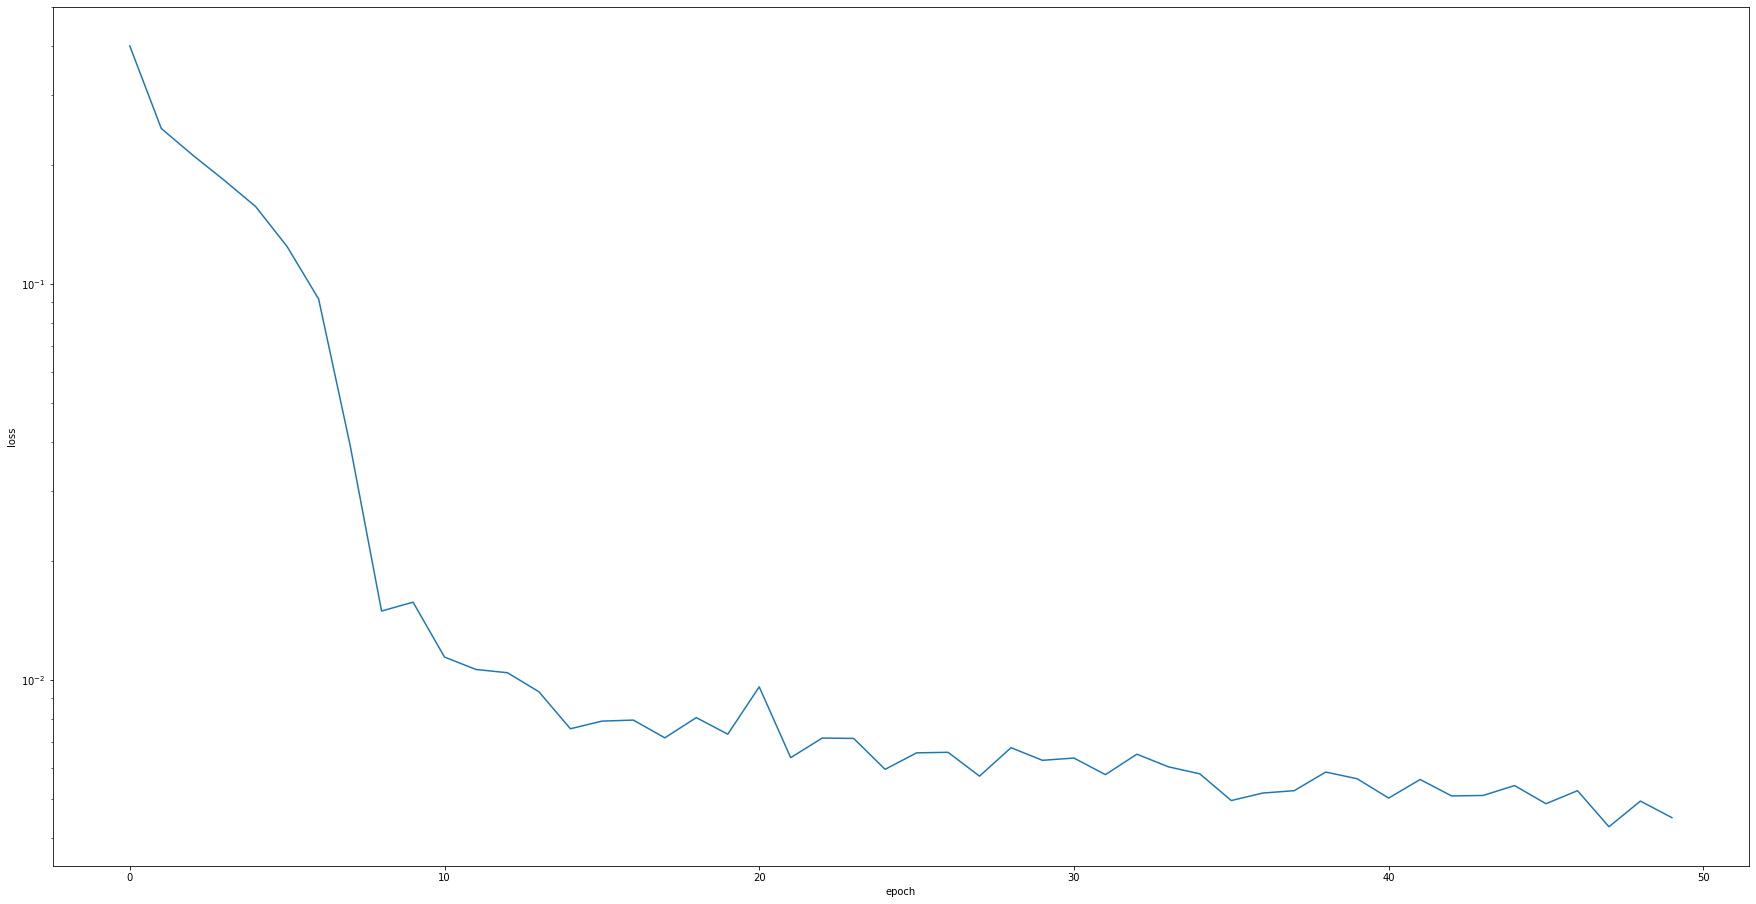

In [5]:
# Modelo LSTM fit
history = m.fit(xin, next_X, epochs = 50, batch_size = 50, verbose = 1)

plt.figure(figsize=(30.4,15.8))
plt.ylabel('loss'); plt.xlabel('epoch')
plt.semilogy(history.history['loss'])

# **Validação**

4/4 [==============================] - 1s 6ms/step


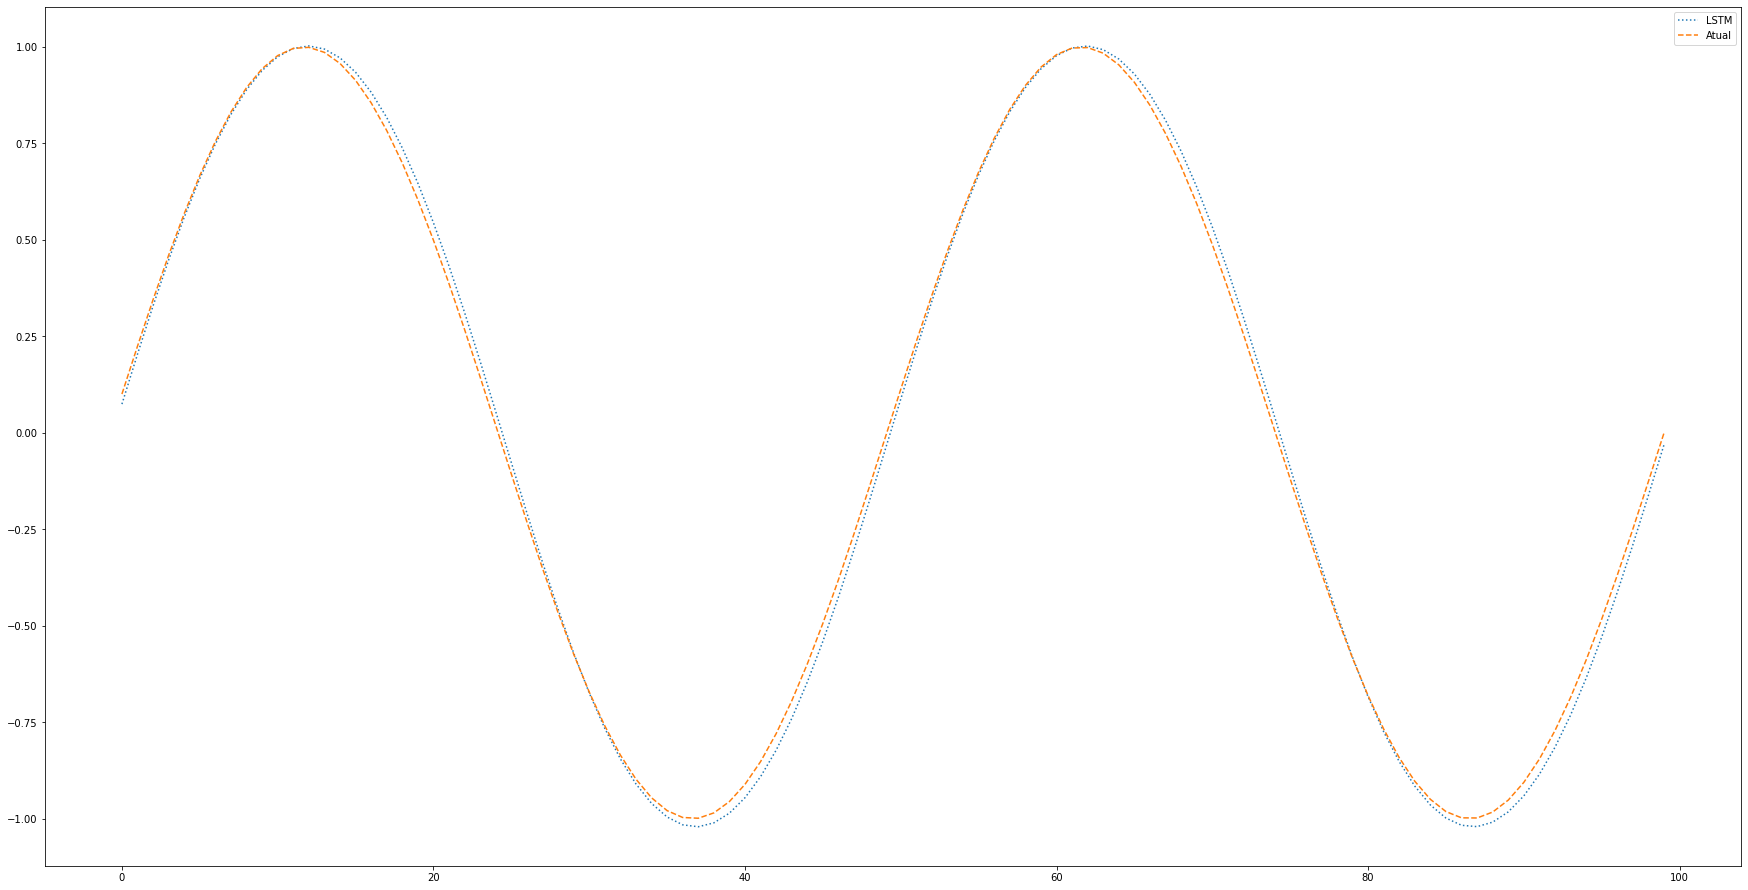

In [6]:
# Armazenar "window" pontos em uma sequência
xin = []
next_x1 = []

for i in range(window, len(Xtest)):
  xin.append(Xtest[i-window:i])
  next_x1.append(Xtest[i])

# Transformar os dados para o formato LSTM
xin, next_x1 = np.array(xin), np.array(next_x1)
xin = xin.reshape((xin.shape[0], xin.shape[1], 1))

# Predizer o próximo valor (1 passo a frente)
X_pred = m .predict(xin)

# Mostrar predição VS dados de teste atual
plt.figure(figsize=(30.4,15.8))
plt.plot(X_pred, ':', label = 'LSTM')
plt.plot(next_x1, '--', label='Atual')
plt.legend()

# **Forecasting**

1/1 [==============================] - 0s 22ms/step


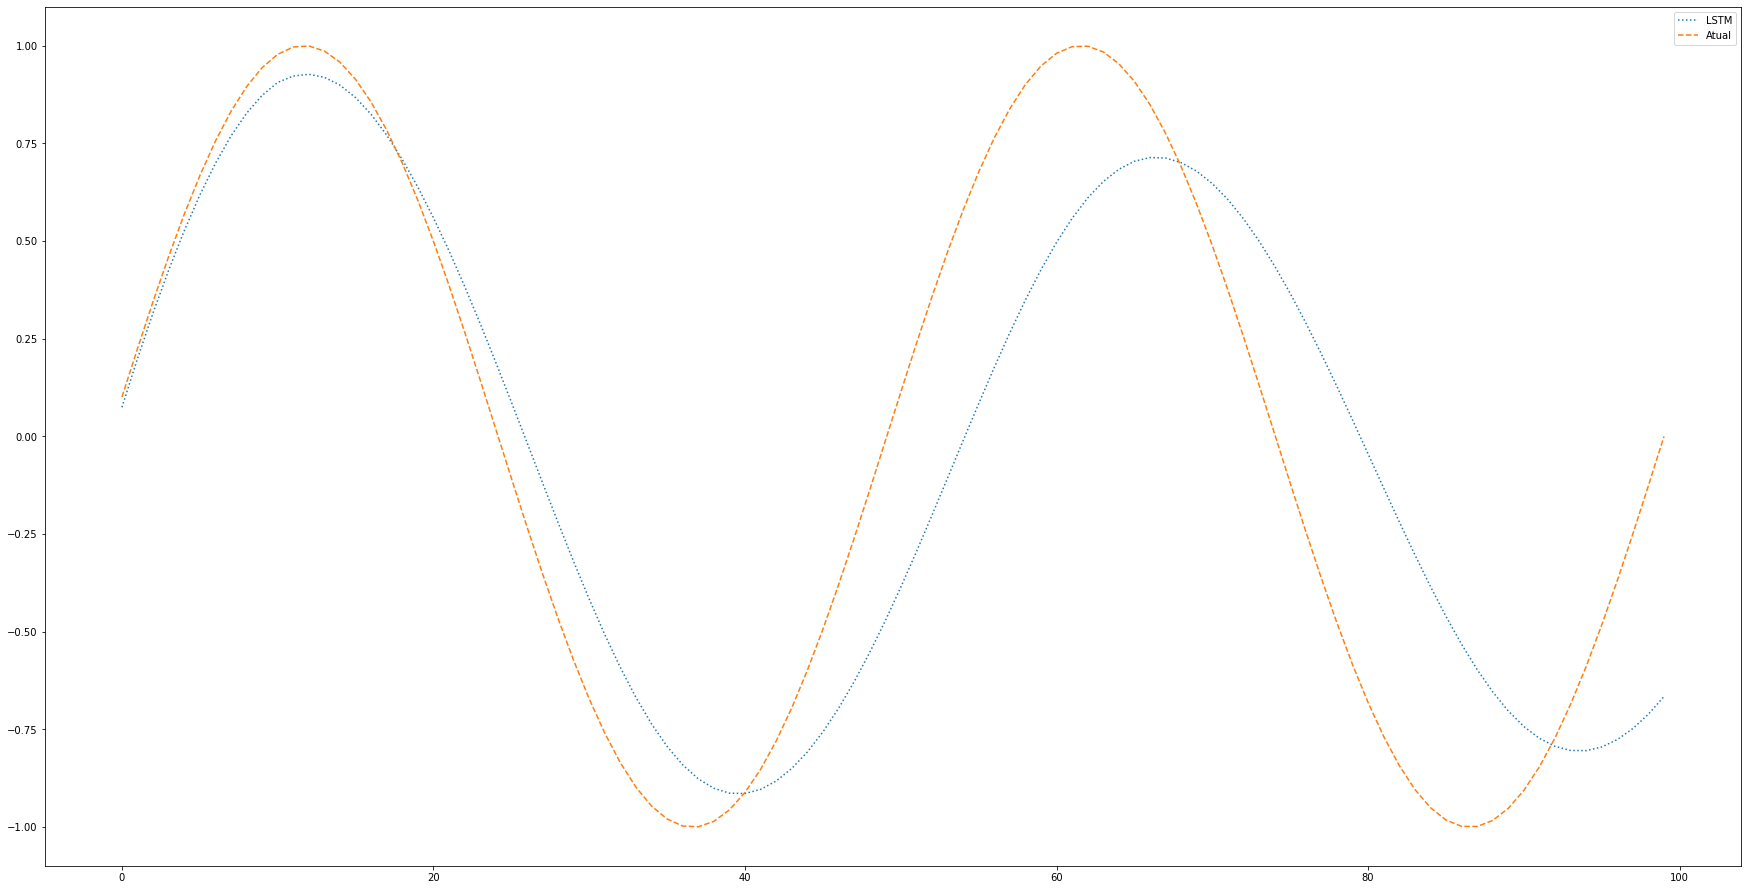

In [7]:
# Usando valores preditivos para predizer o próximo passo

X_pred = Xtest.copy()
for i in range(window, len(X_pred)):
  xin = X_pred[i-window:i].reshape((1, window, 1))
  X_pred[i] = m.predict(xin)

# Mostrar predição VS dados do teste atual
plt.figure(figsize=(30.4,15.8))
plt.plot(X_pred[window:], ':', label='LSTM')
plt.plot(next_x1, '--', label='Atual')
plt.legend()